<a href="https://colab.research.google.com/github/dinhanhthi/data-science-learning/blob/master/PCA_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image compression using PCA

Most of the codes in this file come from [the slides of Yang](https://note.dinhanhthi.com/files/ml/pca/tutorial4-yang.pdf).



## Load the libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

## Connect to Google Drive

Colab Notebooks' files are store in `/content/drive/My Drive/Colab Notebooks/`.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the image

In [7]:
!git clone https://github.com/dinhanhthi/data-science-learning.git

Cloning into 'data-science-learning'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 449 (delta 7), reused 14 (delta 2), pack-reused 427
Receiving objects: 100% (449/449), 125.69 MiB | 30.46 MiB/s, done.
Resolving deltas: 100% (77/77), done.
Checking out files: 100% (297/297), done.


In [12]:
%cd /content/data-science-learning
!git pull origin master

/content/data-science-learning
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 2), reused 6 (delta 2), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/dinhanhthi/data-science-learning
 * branch            master     -> FETCH_HEAD
   6614833..ce721de  master     -> origin/master
Updating 6614833..ce721de
Fast-forward
 project-based-learning/img/labrador.jpg    | Bin 0 -> 183235 bytes
 project-based-learning/img/labrador_bw.jpg | Bin 0 -> 105056 bytes
 2 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 project-based-learning/img/labrador.jpg
 create mode 100644 project-based-learning/img/labrador_bw.jpg


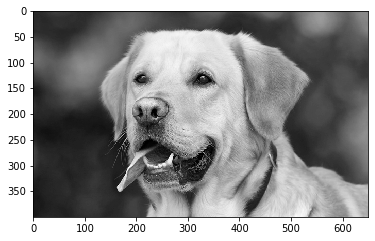

(400, 650)


In [23]:
from PIL import Image

fname = '/content/data-science-learning/project-based-learning/img/labrador.jpg';

## FULL COLOR (3 dimenional)
# img = plt.imread(fname)
# plt.imshow(img)
# plt.show()

## GRAYSCALE
img = np.asarray(Image.open(fname).convert("L"))
# If you have an L mode image, that means it is a single channel image - normally 
#   interpreted as greyscale. The L means that is just stores the Luminance. 
#   It is very compact, but only stores a greyscale, not colour.
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

print(img.shape)

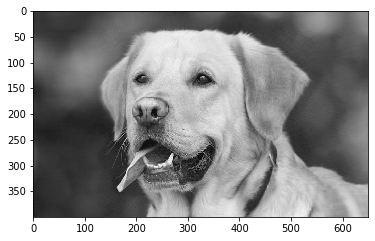

np.shape:  (400, 100)
ni.shape:  (400, 650)


<Figure size 432x288 with 0 Axes>

In [28]:
pca = PCA(n_components=100, svd_solver='full')
pca.fit(img)

nd = pca.transform(img) # transform to 100 dim
ni = pca.inverse_transform(nd) # transform back to 650
plt.imshow(ni, cmap=plt.cm.gray)
plt.show()

print("np.shape: ", np.shape(nd))
print("ni.shape: ", ni.shape)
# print (ni)

plt.savefig('./project-based-learning/img/labrador_compress.jpg')

In [33]:
!git config --global user.email "dinhanhthi@gmail.com"
!git config --global user.name "Anh-Thi Dinh"
!git add .
!git commit -m "colab: reduce img"
!git push origin master

[master 31ceae9] colab: reduce img
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 project-based-learning/img/labrador_compress.jpg
fatal: could not read Username for 'https://github.com': No such device or address
